In [3]:
import pandas as pd
import os
import re
import requests
import json
import twokenize
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.io.export import get_screenshot_as_png
from bokeh.layouts import column

output_notebook()

Loading BokehJS ...

# Sentiment Analysis Using VADER

Our goal is to analyze sentiment of Twitch chatrooms using the sentiment analyzer from [VADER](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner). This approach is known to work well with social media texts, and can be improved to the user's satisfaction by preprocessing the text data as much as desired. A useful feature of VADER is that it benefits from punctuation and capitalization, so there is less filtering needed in the preprocessing step. The only concern is to remove unwanted words and spam messages from our data.

In [5]:
def process_df(df):
    df['body'] = df['body'].apply(lambda x: re.sub("http\S+|[^\x00-\x7F]", "", str(x)))
    df['tokens_body'] = df['body'].apply(lambda x: twokenize.tokenizeRawTweetText(x))

    df['tokens_body'] = df['tokens_body'].apply(lambda x: [i for i in x if i not in all_emotes])
    df['counts'] = df['tokens_body'].apply(lambda x: len(x))
    df_filtered = df[df['counts'] >= 5]
    df_filtered['u_counts'] = df_filtered['tokens_body'].apply(lambda x: len(set(x)))
    df_filtered = df_filtered[df_filtered['u_counts'] >= 5]
    analyzer = SentimentIntensityAnalyzer()
    df_filtered['sent'] = df_filtered['body'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    df_filtered['date'] = df_filtered['created_at'].apply(lambda x: datetime.strptime(datetime.strftime(x, '%Y %m %d %H'), '%Y %m %d %H'))
    
    return df_filtered[['date','sent']]

In [6]:
streamers = ['sodapoppin',
'shroud',
'lirik',
'moonmoon_ow',
'ninja',
'forsen',
'admiralbahroo',
'nl_kripp',
'xqcow',
'loltyler1',
'singsing',
'maximilian_dood',
'cohhcarnage',
'dansgaming',
'admiralbulldog',
'b0aty',
'nickmercs',
'dafran',
'imaqtpie',
'sypherpk',
'disguisedtoasths',
'summit1g',
'tsm_hamlinz',
'giantwaffle',
'joshog',
'timthetatman',
'thijshs',
'drlupo',
'goldglove',
'quin69',
'tsm_myth',
'dakotaz',
'highdistortion',
'shiphtur',
'voyboy',
'xchocobars',
'cryaotic',
'aimbotcalvin',
'chocotaco',
'c9sneaky',
'tsm_viss',
'kinggothalion',
'scarra',
'iwilldominate',
'tfue',
'grimmmz',
'kingrichard',
'followgrubby',
'p4wnyhof',
'savjz',
'sacriel',
'bmkibler']

In [19]:
j = 0
for streamer in streamers:
    df = pd.read_csv('trimmed_data/' + streamer + '_trim.csv', parse_dates=['created_at'])
    df = process_df(df)
    df.to_csv('sentiment_data/' + streamer +'_sent.csv')
    j+=1
    print(streamer + ' processed.')
    del df

C:\Users\Daniel\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sodapoppin processed.
shroud processed.
lirik processed.
moonmoon_ow processed.
ninja processed.
forsen processed.
admiralbahroo processed.
nl_kripp processed.
xqcow processed.
loltyler1 processed.
singsing processed.
maximilian_dood processed.
cohhcarnage processed.
dansgaming processed.
admiralbulldog processed.
b0aty processed.
nickmercs processed.
dafran processed.
imaqtpie processed.
sypherpk processed.
disguisedtoasths processed.
summit1g processed.
tsm_hamlinz processed.
giantwaffle processed.
joshog processed.
timthetatman processed.
thijshs processed.
drlupo processed.
goldglove processed.
quin69 processed.
tsm_myth processed.
dakotaz processed.
highdistortion processed.
shiphtur processed.
voyboy processed.
xchocobars processed.
cryaotic processed.
aimbotcalvin processed.
chocotaco processed.
c9sneaky processed.
tsm_viss processed.
kinggothalion processed.
scarra processed.
iwilldominate processed.
tfue processed.
grimmmz processed.
kingrichard processed.
followgrubby process

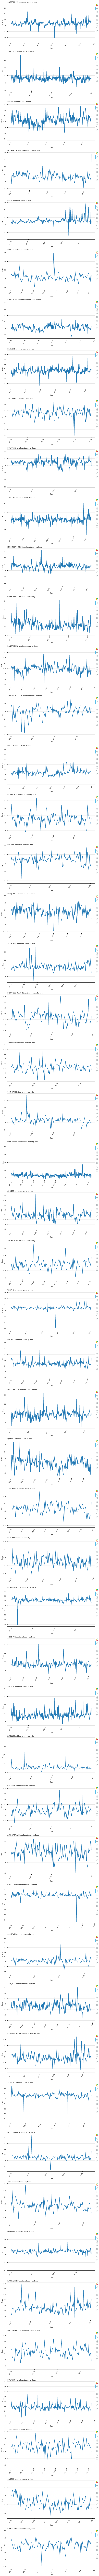

In [19]:
plots = []
for streamer in streamers:
    df = pd.read_csv('sentiment_data/'+ streamer + '_sent.csv', parse_dates=['date'])
    df = df.sort_values(by=['date'])
    df_score = df.groupby('date')['sent'].mean().to_frame()
    df_score['date_string'] = df_score.index
    
    x = [i for i in range(len(df_score))]
    y = df_score['sent']
    p = figure(plot_height=400, plot_width=800,
               title=streamer.upper() + " sentiment score by hour", tools="pan,wheel_zoom,xwheel_zoom,ywheel_zoom,box_zoom,reset,save")
    p.xaxis.major_label_overrides = {
        i: date.strftime('%b %d') for i, date in enumerate(pd.to_datetime(df_score["date_string"]))
    }
    p.line(x, y, line_width=2)
    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    p.xaxis.axis_label = "Date"
    p.yaxis.axis_label = "Score"
    p.xaxis.major_label_orientation = 1
    plots.append(p)
get_screenshot_as_png(column(*plots))

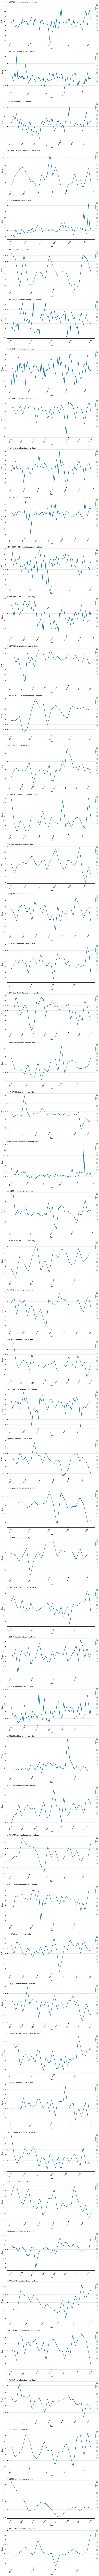

In [20]:
plots = []
for streamer in streamers:
    df = pd.read_csv('sentiment_data/'+ streamer + '_sent.csv', parse_dates=['date'])
    df['date_day'] = df['date'].apply(lambda x: datetime.strptime(datetime.strftime(x, '%Y %m %d'), '%Y %m %d'))
    df = df.sort_values(by=['date_day'])
    df_score = df.groupby('date_day')['sent'].mean().to_frame()
    df_score['date_string'] = df_score.index
    
    x = [i for i in range(len(df_score))]
    y = df_score['sent']
    p = figure(plot_height=400, plot_width=800,
               title=streamer.upper() + " sentiment score by hour", tools="pan,wheel_zoom,xwheel_zoom,ywheel_zoom,box_zoom,reset,save")
    p.xaxis.major_label_overrides = {
        i: date.strftime('%b %d') for i, date in enumerate(pd.to_datetime(df_score["date_string"]))
    }
    p.line(x, y, line_width=2)
    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    p.xaxis.axis_label = "Date"
    p.yaxis.axis_label = "Score"
    p.xaxis.major_label_orientation = 1
    plots.append(p)
get_screenshot_as_png(column(*plots))